#### Predicting if an employee will leave the company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_excel("Employee-attrition-data.xlsx", sheet_name=0)

In [3]:
data2 = pd.read_excel("Employee-attrition-data.xlsx", sheet_name=1)

In [4]:
data1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [5]:
data1.shape,data2.shape

((11428, 10), (3571, 10))

In [6]:
data1["Employee_status"]="Existing"

In [7]:
data1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Existing
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Existing
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Existing
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Existing
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Existing


In [8]:
data2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [9]:
data2["Employee_status"]="Left"

In [10]:
data2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status
0,1,0.38,0.53,2,157,3,0,0,sales,low,Left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Left
3,4,0.72,0.87,5,223,5,0,0,sales,low,Left
4,5,0.37,0.52,2,159,3,0,0,sales,low,Left


In [11]:
#Lets drop emp ID column because it has a lot of unique values and does not affect our analysis
data1.drop(columns="Emp ID", inplace=True)

In [12]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status
0,0.58,0.74,4,215,3,0,0,sales,low,Existing
1,0.82,0.67,2,202,3,0,0,sales,low,Existing
2,0.45,0.69,5,193,3,0,0,sales,low,Existing
3,0.78,0.82,5,247,3,0,0,sales,low,Existing
4,0.49,0.60,3,214,2,0,0,sales,low,Existing


In [13]:
#Lets drop emp ID column because it has a lot of unique values and does not affect our analysis
data2.drop(columns="Emp ID",inplace=True)

In [14]:
data2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status
0,0.38,0.53,2,157,3,0,0,sales,low,Left
1,0.80,0.86,5,262,6,0,0,sales,medium,Left
2,0.11,0.88,7,272,4,0,0,sales,medium,Left
3,0.72,0.87,5,223,5,0,0,sales,low,Left
4,0.37,0.52,2,159,3,0,0,sales,low,Left


In [15]:
## Joining the two data sets 
data3 = pd.concat([data1,data2],ignore_index= True, sort = False)

In [16]:
data3

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status
0,0.58,0.74,4,215,3,0,0,sales,low,Existing
1,0.82,0.67,2,202,3,0,0,sales,low,Existing
2,0.45,0.69,5,193,3,0,0,sales,low,Existing
3,0.78,0.82,5,247,3,0,0,sales,low,Existing
4,0.49,0.60,3,214,2,0,0,sales,low,Existing
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,Left
14995,0.37,0.48,2,160,3,0,0,support,low,Left
14996,0.37,0.53,2,143,3,0,0,support,low,Left
14997,0.11,0.96,6,280,4,0,0,support,low,Left


In [17]:
data3.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Employee_status          0
dtype: int64

In [18]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [19]:
Emp_status =data3.groupby("Employee_status")
Emp_status.mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
Employee_status,,,,,,,
Existing,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
Left,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


- Employees who left had a low satisfaction level of 44% as compared to those existing who have a satisfaction level of 67%

In [20]:
depart = data3.groupby("dept")
depart.mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
dept,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.008973


- Accounting, hr ad technical departments have the lowest satisfaction of 58%,59%, and 60% respectively

In [21]:
sal = data3.groupby("salary")
sal.mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
salary,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.028079


- Employees with low salary have the lowest satisfaction level(60%) followed by those who receive medium salary(62%).

### Data Visualization
#### Univariate Analysis

<AxesSubplot:xlabel='Employee_status', ylabel='satisfaction_level'>

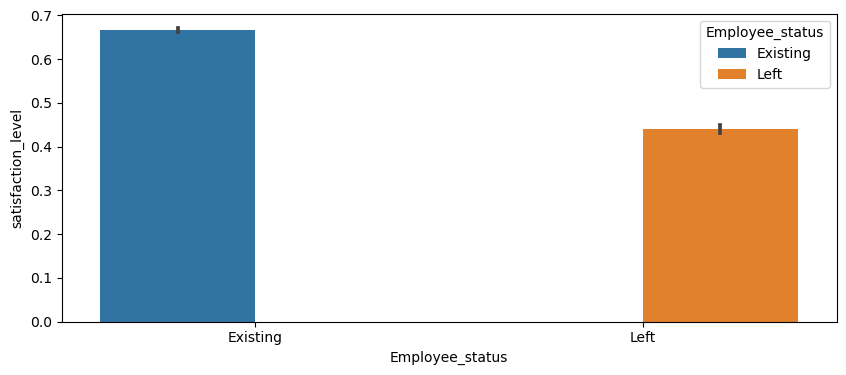

In [22]:
#Barplots
plt.figure(figsize=(10,4))
sns.barplot(x="Employee_status",y="satisfaction_level",data=data3,hue="Employee_status")

- Those who left the company had a low satisfaction level (below 50%)
- Employees who are still in the company have a satifaction level above 65%

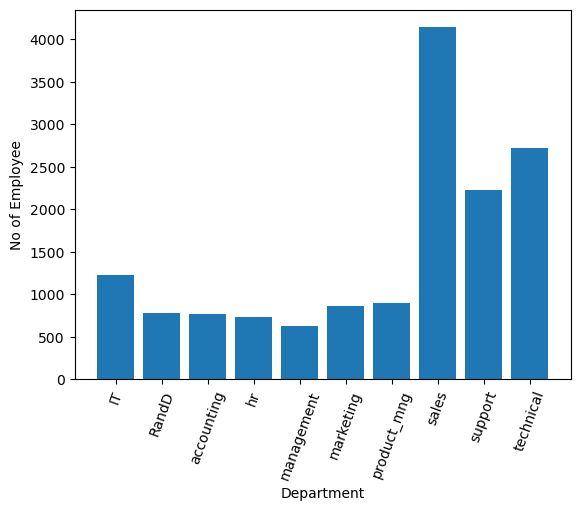

In [23]:
## Bar graph visualize employee status and satisfaction level
status_count=data3.groupby("dept").count()
plt.bar(status_count.index.values,status_count["satisfaction_level"])
plt.xlabel("Department")
plt.ylabel("No of Employee")
plt.xticks(rotation=70)
plt.show()

- Most employees come from the sales department followed by technical and support in that order.

<AxesSubplot:xlabel='number_project', ylabel='satisfaction_level'>

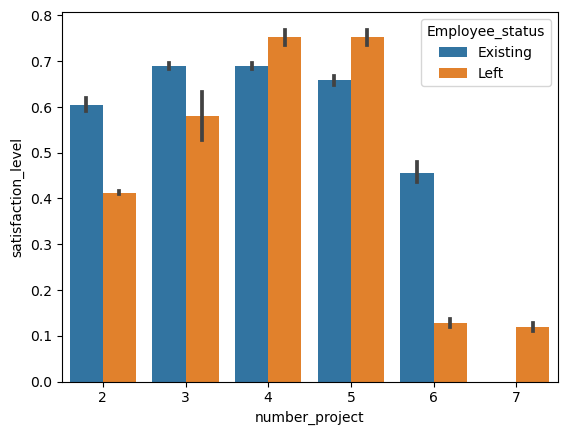

In [24]:
sns.barplot(x="number_project",y="satisfaction_level",data=data3,hue="Employee_status")

- A large number of employees do 3 to 5 projects in their time in the company.
- This group of employee also have a high satisfaction level 
- The satisfaction level for employees with more than 5 projects reduces. This might be bacause of lack of promotion.
- Employees with more than 6 projects have left the company.

<AxesSubplot:xlabel='time_spend_company', ylabel='satisfaction_level'>

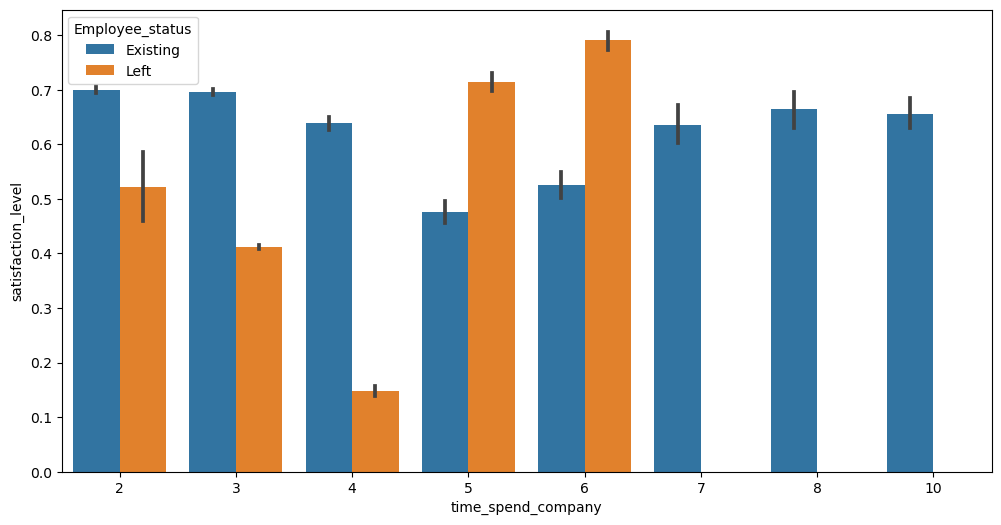

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x="time_spend_company",y="satisfaction_level",data=data3,hue="Employee_status",)

- Employees who have spent 4 years in the company have the lowest satisfaction level. 
- Employees who have more than 6 years in the company do stay.

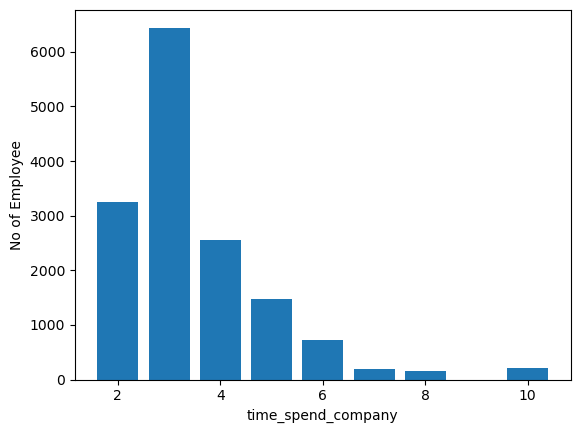

In [26]:
## Bar graph visualize time_spend_company and satisfaction level
status_count=data3.groupby("time_spend_company").count()
plt.bar(status_count.index.values,status_count["satisfaction_level"])
plt.xlabel("time_spend_company")
plt.ylabel("No of Employee")
plt.show()

- Most employees spend 3 years in the company. From here, there is a downward trend of experienced employees in the company.

#### Subplots

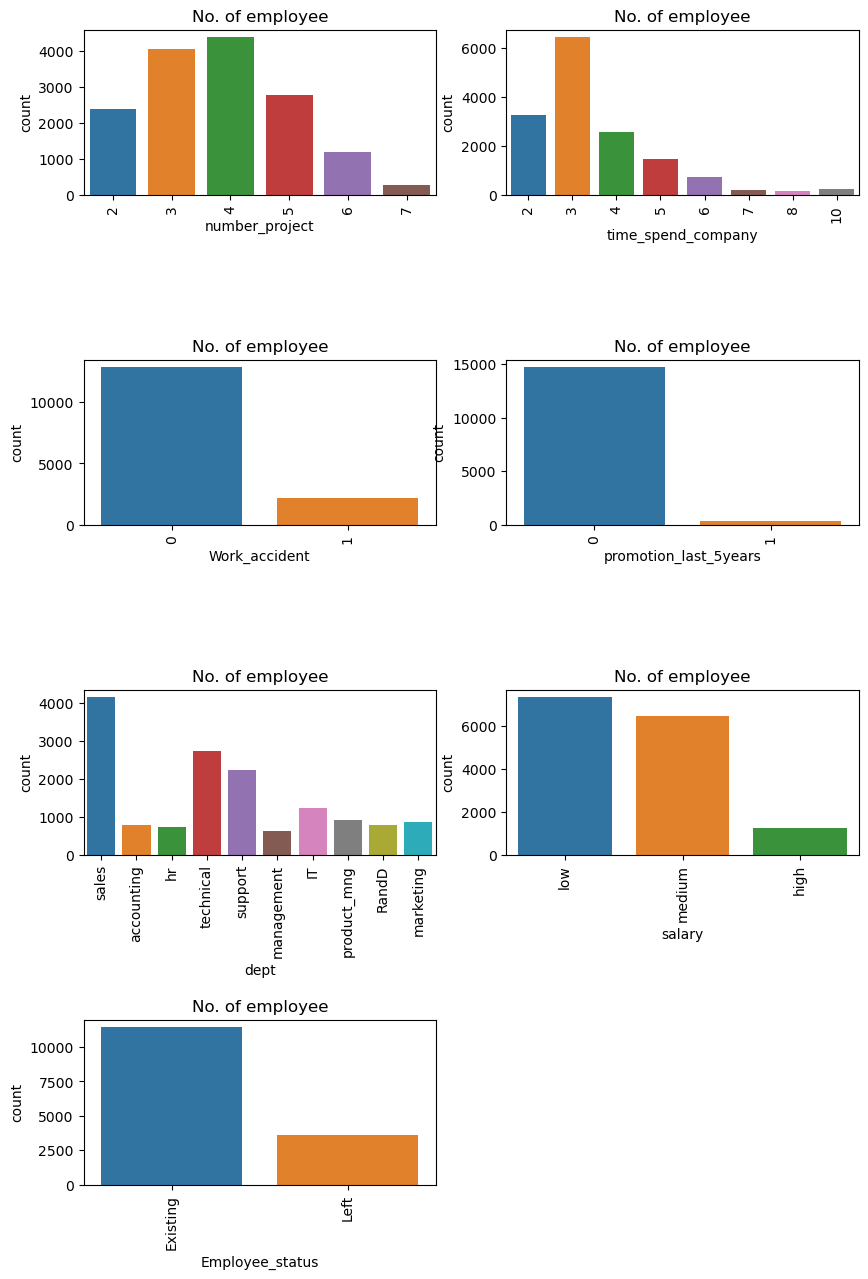

In [27]:
variables =['number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary','Employee_status']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(variables):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data3)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

#### Comparing the trends for existing and employees who left

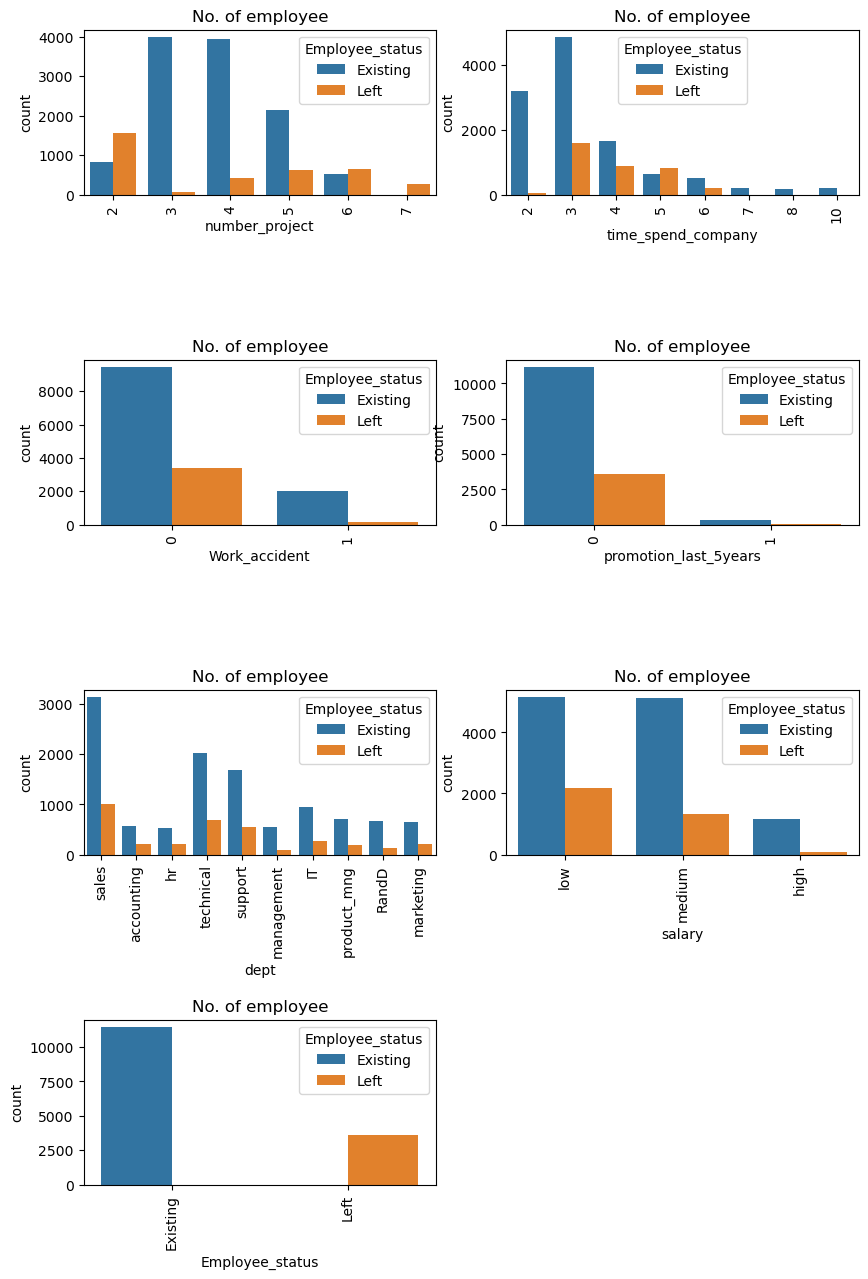

In [28]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(variables):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data3, hue='Employee_status')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

- Employees who have done more that 5 projects have left the company.
- Sales, technical and support departments have the largest number of employees who left the company. This can be attributed to the low satisfaction level from these departments.
- A very small percentage of those promoted in the last 5 years left the company. Those who left mostly did not receive a promotion in the last 5 years.
- Employees receiving low salary mostly leave the company. This is followed by medium earners.


In [29]:
# lets change get dummies for employee status before we create a heatmap
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
S=le.fit_transform(data3["salary"])
S

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
data3["Salary"]=S

In [31]:
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status,Salary
0,0.58,0.74,4,215,3,0,0,sales,low,Existing,1
1,0.82,0.67,2,202,3,0,0,sales,low,Existing,1
2,0.45,0.69,5,193,3,0,0,sales,low,Existing,1
3,0.78,0.82,5,247,3,0,0,sales,low,Existing,1
4,0.49,0.60,3,214,2,0,0,sales,low,Existing,1


In [32]:
#check which numbers were assigned to low,medium and high salary
data3.loc[data3["salary"]=="high"]
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status,Salary
0,0.58,0.74,4,215,3,0,0,sales,low,Existing,1
1,0.82,0.67,2,202,3,0,0,sales,low,Existing,1
2,0.45,0.69,5,193,3,0,0,sales,low,Existing,1
3,0.78,0.82,5,247,3,0,0,sales,low,Existing,1
4,0.49,0.60,3,214,2,0,0,sales,low,Existing,1


In [33]:
data3.loc[data3["salary"]=="medium"]
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Employee_status,Salary
0,0.58,0.74,4,215,3,0,0,sales,low,Existing,1
1,0.82,0.67,2,202,3,0,0,sales,low,Existing,1
2,0.45,0.69,5,193,3,0,0,sales,low,Existing,1
3,0.78,0.82,5,247,3,0,0,sales,low,Existing,1
4,0.49,0.60,3,214,2,0,0,sales,low,Existing,1


In [34]:
## Dropping the column "salary" which has been replaced by "Salary"
data3.drop(["salary"],axis=1,inplace=True)
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Employee_status,Salary
0,0.58,0.74,4,215,3,0,0,sales,Existing,1
1,0.82,0.67,2,202,3,0,0,sales,Existing,1
2,0.45,0.69,5,193,3,0,0,sales,Existing,1
3,0.78,0.82,5,247,3,0,0,sales,Existing,1
4,0.49,0.60,3,214,2,0,0,sales,Existing,1


In [35]:
## Transforming the department column
D =le.fit_transform(data3["dept"])
D

array([7, 7, 7, ..., 8, 8, 8])

In [36]:
data3["Dept"]=D
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Employee_status,Salary,Dept
0,0.58,0.74,4,215,3,0,0,sales,Existing,1,7
1,0.82,0.67,2,202,3,0,0,sales,Existing,1,7
2,0.45,0.69,5,193,3,0,0,sales,Existing,1,7
3,0.78,0.82,5,247,3,0,0,sales,Existing,1,7
4,0.49,0.60,3,214,2,0,0,sales,Existing,1,7


In [37]:
#Drpping the previous department column
data3.drop(["dept"],axis=1,inplace=True)
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Employee_status,Salary,Dept
0,0.58,0.74,4,215,3,0,0,Existing,1,7
1,0.82,0.67,2,202,3,0,0,Existing,1,7
2,0.45,0.69,5,193,3,0,0,Existing,1,7
3,0.78,0.82,5,247,3,0,0,Existing,1,7
4,0.49,0.60,3,214,2,0,0,Existing,1,7


In [38]:
#Transforming Employee status column to numericak
E=le.fit_transform(data3["Employee_status"])
E

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
data3["Status"]=E
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Employee_status,Salary,Dept,Status
0,0.58,0.74,4,215,3,0,0,Existing,1,7,0
1,0.82,0.67,2,202,3,0,0,Existing,1,7,0
2,0.45,0.69,5,193,3,0,0,Existing,1,7,0
3,0.78,0.82,5,247,3,0,0,Existing,1,7,0
4,0.49,0.60,3,214,2,0,0,Existing,1,7,0


In [40]:
data3.drop(["Employee_status"],axis=1,inplace=True)
data3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary,Dept,Status
0,0.58,0.74,4,215,3,0,0,1,7,0
1,0.82,0.67,2,202,3,0,0,1,7,0
2,0.45,0.69,5,193,3,0,0,1,7,0
3,0.78,0.82,5,247,3,0,0,1,7,0
4,0.49,0.60,3,214,2,0,0,1,7,0


### Heatmap

<AxesSubplot:>

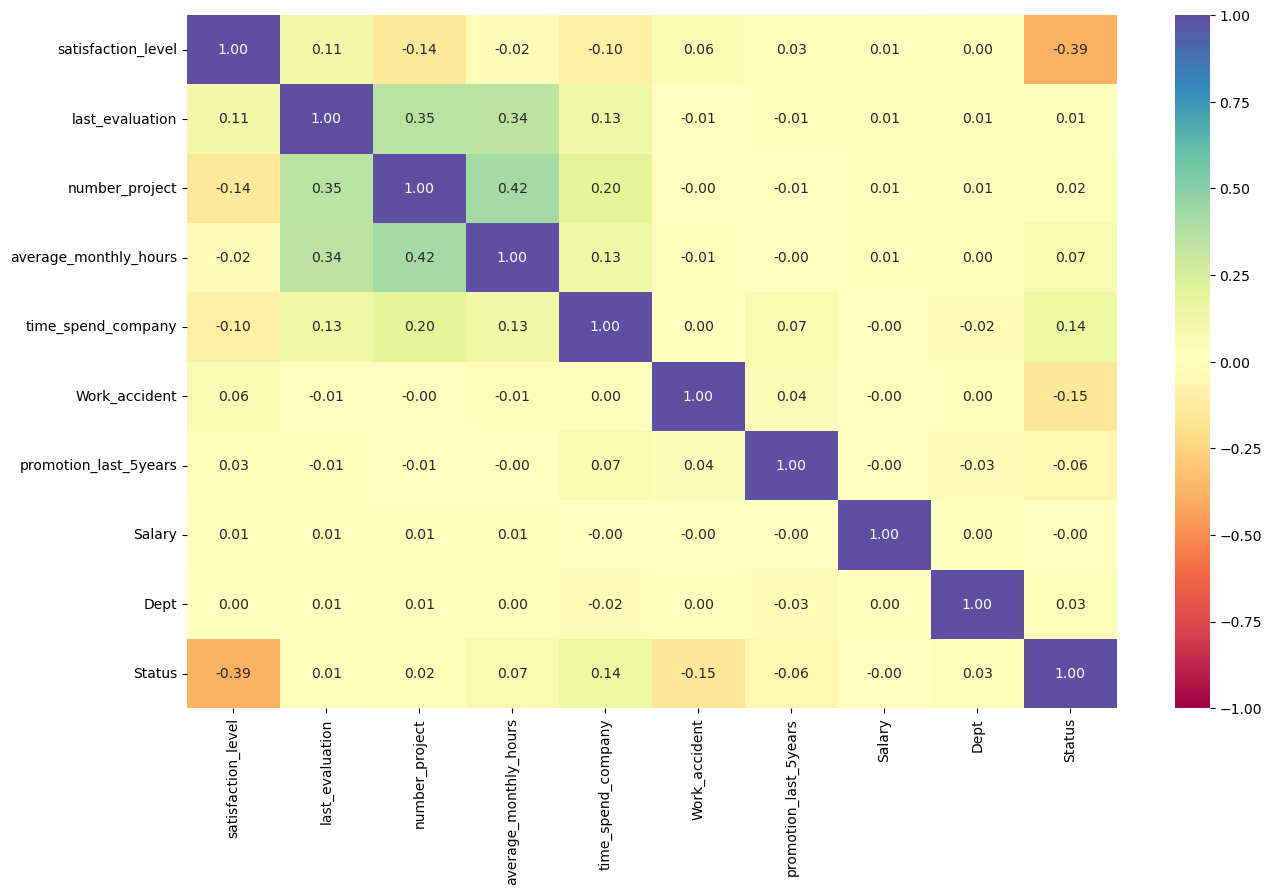

In [41]:
plt.figure(figsize=(15,9))
sns.heatmap(data3.corr(),annot=True,fmt=".2f", vmin=-1,vmax=1,cmap="Spectral")

- Employee status and satisfaction level is negatively correlated at -0.39

## Modelling 

In [49]:
# Defining predictors and dependent variables
X = data3.drop(["Status"],axis=1)
y = data3["Status"]
X.shape,y.shape

((14999, 9), (14999,))

In [59]:
#spliting data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

In [60]:
X_train.shape,X_test.shape

((10499, 9), (4500, 9))

### Logistic Regression

In [62]:
# Classification model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Samoei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=lr.predict(X_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3415
           1       0.51      0.26      0.34      1085

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500



- The model has a low accuracy score of 76%
- This means it does not do well for our data

### DecisionTree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred2 = dr.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3415
           1       0.94      0.97      0.96      1085

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



- The model has a high accuracy score of 97%. This means the propability of the model predicting wrong values is only 3%

### Feature Importance for Decision Tree

In [82]:
feature_importance = pd.DataFrame(dt.feature_importances_,
                                  index=X_train.columns,columns=["importance"]).sort_values("importance",ascending=False)
feature_importance

,importance
satisfaction_level,0.494593
last_evaluation,0.147422
time_spend_company,0.141636
number_project,0.104404
average_monthly_hours,0.093367
Dept,0.013010
Salary,0.004793
Work_accident,0.000680
promotion_last_5years,0.000095


- Satisfaction level is the main reason why an employee leaves the company